## YEAST GROWTH CHERRY PICKING

by Anastasia Abashidze


Blavatnik Center for Drug Discovery
***

## Introduction

Cherry picking is a confirmation test for compounds showing certain activities in the primary screen. Here we test yeast growth with 3 concentrations of each compound.

***

## The Workflow

[Import Ppackages and create Output Folder](#import)     
[Load Data](#load_data)     
[Calculate Growth Score and add Layout](#gscore)   
[Run QC and create Results Table](#results)   
[Plot Growth Curves](#plot_curves)  
[Plot Growth Scores](#plot_scores)    
[Create Presentation](#ppt)    
[Conclusions](#conclusions)  

 ***

### Import Packages and create Output Folder
<a id="import"></a>

In [1]:
from nbdev.showdoc import *
import os
import sys
sys.path.append('..//')
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib as mpl
%matplotlib inline
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context = 'notebook', style = 'white', palette = 'dark')
#%load_ext autoreload
#%autoreload 2
#hide
from simplydrug.core import *

#### Create folder to save the output

In [2]:
path = ('yeast_cherry_output') 
if not os.path.exists(path):
    os.mkdir(path)
    print('Output folder created')

#### Defining palette

In [3]:
# Here we have 3 concentrations for each compound, and we define colors for each concentration

palette = {1.87:'Turquoise', 9.95: 'Dodgerblue', 49.8:'Navy', 'Negative':'Darkred','Positive':'Darkgreen',}

hue_order = [1.87, 9.95, 49.8, 'Positive', 'Negative']

### Load OD Data
<a id="load_data"></a>
__Our measurements are in OD (Optical Density Units).__

In [4]:
data_path = 'hts_data//yeast_data//cherry_picking//yeast_dr_data.csv'
chem_path = 'hts_data//yeast_data//cherry_picking//yeast_dr_compounds.csv'
chem_plate = 'example_compounds'
layout_path = 'hts_data//yeast_data//cherry_picking//yeast_dr_layout.xlsx'

In [5]:
data = pd.read_csv(data_path).drop(columns = ['plate'])
print(data.shape)
display(data.head(3))

(24, 97)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,D16,D17,D18,D19,D20,D21,D22,D23,D24,Time
0,0.10855,0.10741,0.10294,0.10563,0.10166,0.10511,0.10234,0.10397,0.10615,0.10585,...,0.10739,0.10817,0.11160,0.10811,0.10866,0.10725,0.10711,0.10489,0.10461,1
1,0.13305,0.15728,0.19902,0.26659,0.16681,0.21735,0.23357,0.24426,0.27030,0.28999,...,0.19804,0.20925,0.21448,0.20754,0.19529,0.19360,0.18320,0.26362,0.25073,10
2,0.13855,0.16287,0.23564,0.33773,0.19574,0.27080,0.28733,0.31006,0.35332,0.38637,...,0.22993,0.24442,0.24891,0.24164,0.22675,0.22432,0.21193,0.33483,0.31664,11


### Calculate Growth Score and add Layout
<a id="gscore"></a>

In [6]:
gs_data = calculate_growth_score(data)
print(gs_data.shape)
display(gs_data.head(3))

(2304, 5)


,Well,Time,OD,grate,gscore
0,A1,1,0.10855,0.000000,0.55131
11,A1,2,0.11042,0.017227,0.55131
17,A1,3,0.11391,0.031607,0.55131


In [7]:
gs_data = add_layout(gs_data, layout_path, 
                         chem_path = chem_path, chem_plate = chem_plate)
print(gs_data.shape)
display(gs_data.head(3))

Added  Well
Added  Status
Added compounds:  example_compounds 

(2304, 9)


,Well,Time,OD,grate,gscore,Status,Plate,Compound_id,Dose
0,A1,1,0.10855,0.000000,0.55131,Negative,NaN,NaN,NaN
1,A1,2,0.11042,0.017227,0.55131,Negative,NaN,NaN,NaN
2,A1,3,0.11391,0.031607,0.55131,Negative,NaN,NaN,NaN


### Plot Growth Curves
<a id="plot_curves"></a>
__To plot each compound with controls,we have first prepare the data:__ 
* __Drop References__
* __Fill empty values in the 'dose' column in control wells with values from 'Status' column__
* __Divide data on controls and samples__
* __Divide samples on compounds__
* __Plot each compound and controls__

In [8]:
# drop References
gs_data = gs_data[gs_data.Dose != 'Reference']

# Fill empty values in the 'dose' column in control wells with values from 'Status' column
gs_data['Dose'] = np.where((gs_data.Status != 'Sample') , gs_data['Status'], gs_data['Dose'])
print(gs_data.Dose.unique())

['Negative' 1.87 49.8 9.95 'Reference' 'Positive']


/home/anastasia/anaconda3/envs/py36/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


#### Divide on controls and samples

In [9]:
controls = gs_data[gs_data.Status != 'Sample']
comps = gs_data[gs_data.Status == 'Sample']
print(gs_data.shape[0], (controls.shape[0] + comps.shape[0]))

2304 2304


#### Plot compounds

Compound_0001


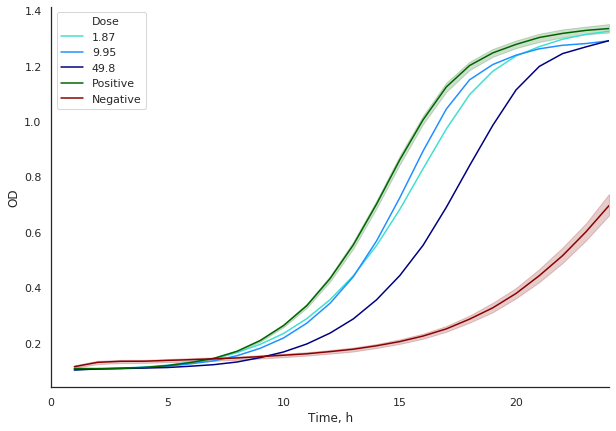

Compound_0002


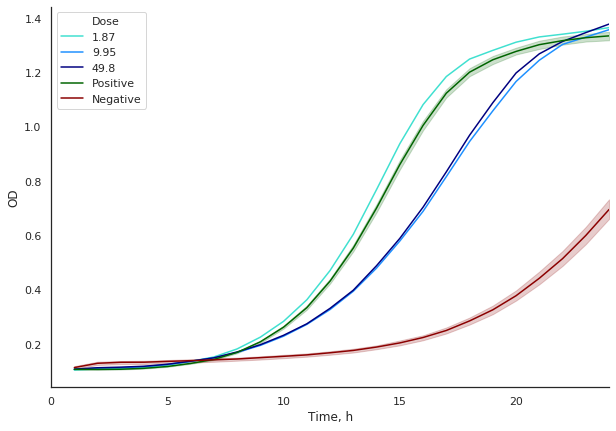

Compound_0003


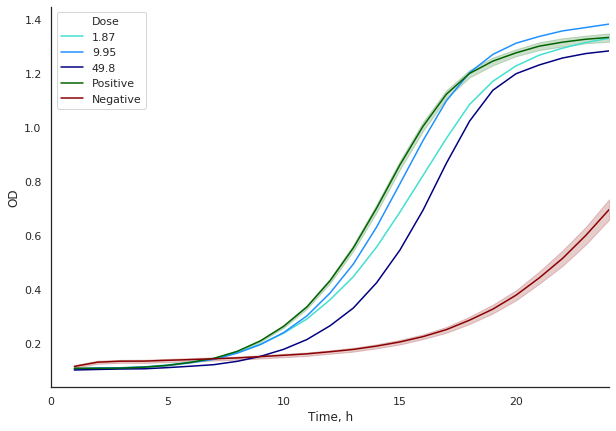

Compound_0004


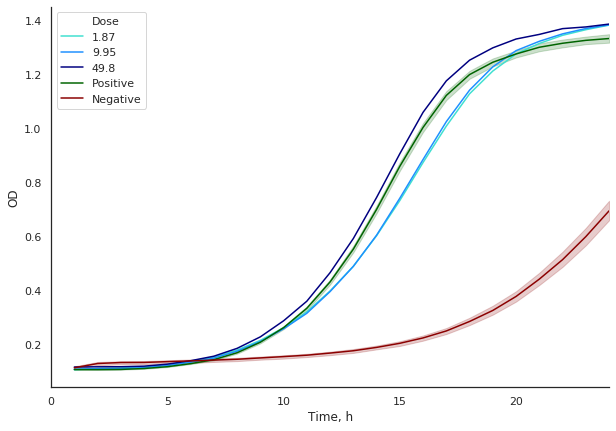

Compound_0017


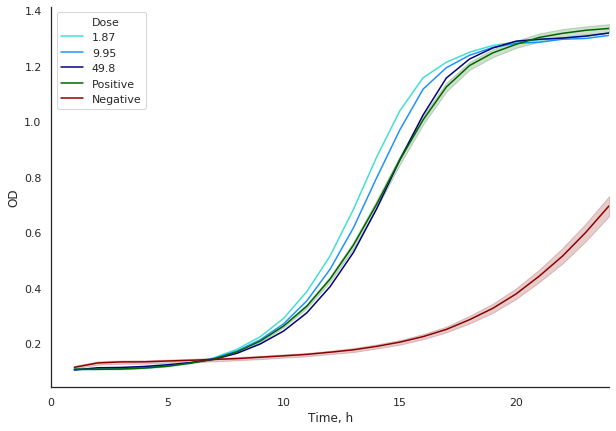

Compound_0018


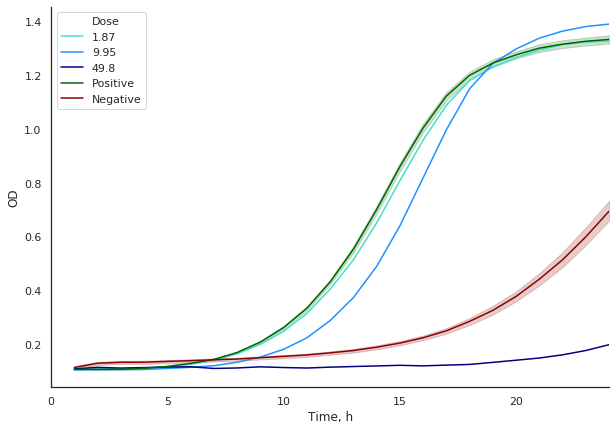

Compound_0019


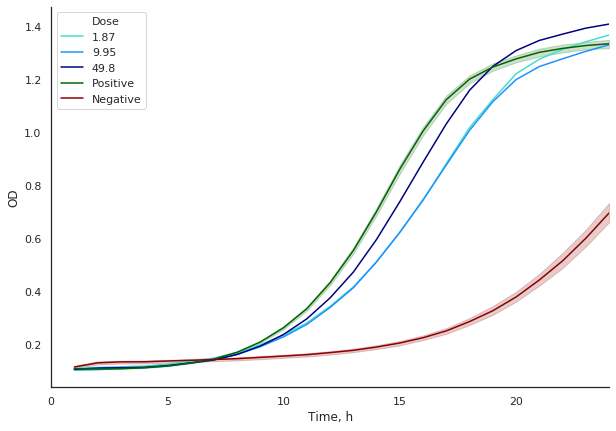

Compound_0020


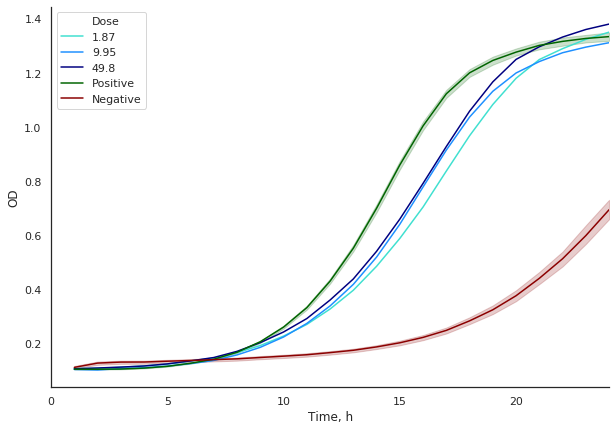

Compound_0032


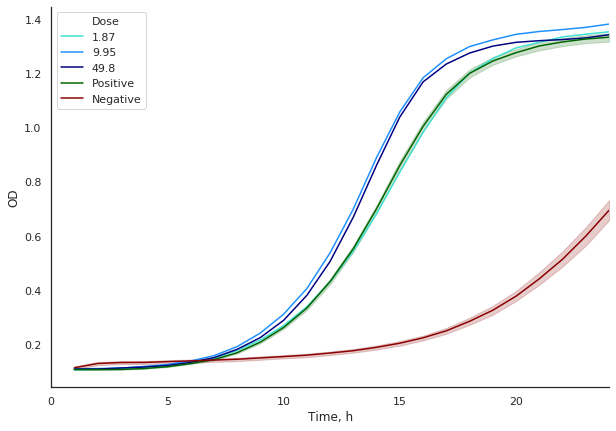

Compound_0034


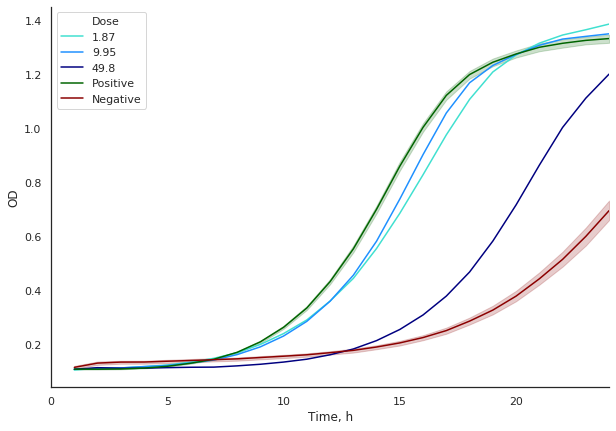

Compound_0035


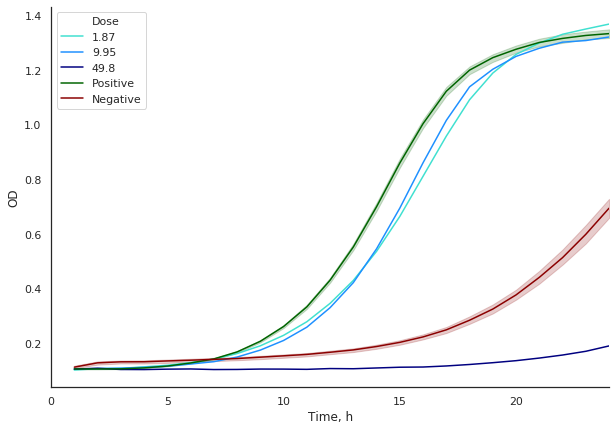

Compound_0036


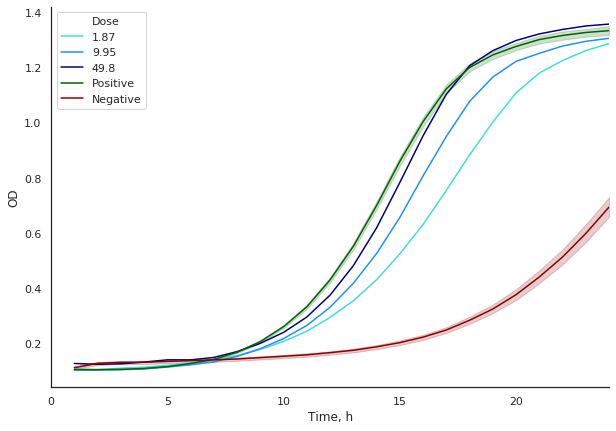

Compound_0049


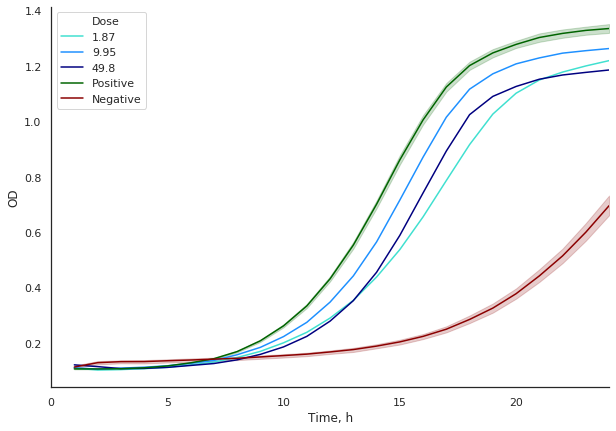

Compound_0050


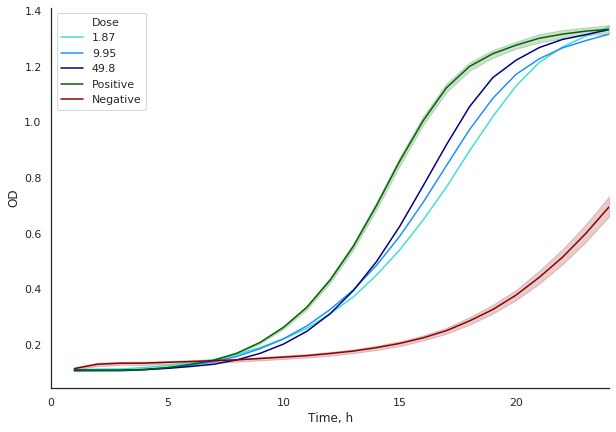

Compound_0051


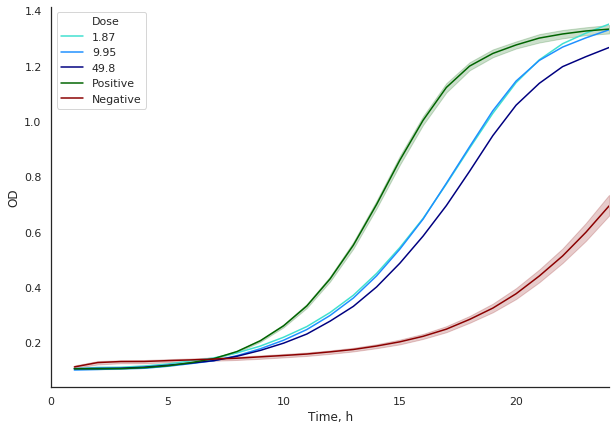

In [10]:
for name, c in gs_data.groupby('Compound_id'):
    c = c.append(controls)
    print(name)
    plot_curve_mean(x = 'Time', y = 'OD', hue = 'Dose', df = c, hue_order = hue_order, 
                                   ylabel = 'OD', xlabel = 'Time, h', xlimit = 24, palette = palette, 
                   save_as =  str(name) +'_DR1_line.png', path = path)

### Run QC and create Results Table
<a id="results"></a>

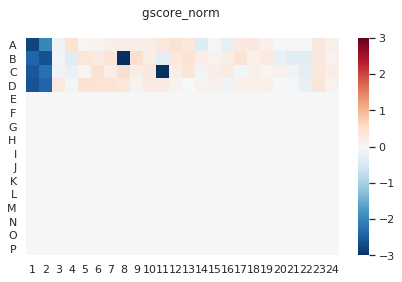

,Feature,Status,size,mean,std,var,Z_factor,SB
0,gscore_norm,Negative,8.0,-2.445635e+00,0.240764,0.057967,0.61839,-0.102739
1,gscore_norm,Positive,8.0,2.512627e-01,0.102291,0.010463,0.61839,-0.102739
2,gscore_norm,Sample,45.0,-9.600345e-16,1.000000,1.000000,0.61839,-0.102739


In [11]:
results = gs_data[['Plate', 'Well', 'Compound_id', 'Dose', 'gscore','Status']].drop_duplicates(subset = ['Well']) 
results.Plate = 'yeast_cp_run1'

# normalize results
results = normalize_z(results, 'gscore')
# heatmap
hts_heatmap(results, layout_path, ['gscore_norm'], path)
# calculate statistics
try:
    stats = sum_statistics(results, 'gscore_norm')
    stats.to_csv(path + '//sum_statistics_CP1.csv', index = False)
    display(stats)
except Exception as e:
    print(e)

#### Add SMILES and save results to csv    

In [12]:
#path to chemical library:  chem_path = '..//resources//compounds//example_chemicals.csv'

all_comps = pd.read_csv('..//resources//compounds//example_chemicals.csv', low_memory = False)
results = pd.merge(results, all_comps[['Compound_id', 'SMILES', 'Compound Name', 'SecName']], 
                how = 'left', on = 'Compound_id').drop_duplicates('Well')
results = results[results.Status != 'Reference']
results.to_csv(path + '//yeast_CP1.csv', index = False)
display(results.head(3))

,Plate,Well,Compound_id,Dose,gscore,Status,gscore_norm,SMILES,Compound Name,SecName
0,yeast_cp_run1,A1,NaN,Negative,0.551310,Negative,-2.748915,NaN,NaN,NaN
1,yeast_cp_run1,A10,Compound_0017,1.87,1.296354,Sample,0.232821,S=C(NN=C1CCCCCC1)Nc1cccc(Cl)c1,NaN,NaN
2,yeast_cp_run1,A11,Compound_0032,49.8,1.317239,Sample,0.316405,CC(C)CC(NC(=O)CNC(=O)c1cc(Cl)ccc1Cl)B(O)O,MLN2238,NaN


### Plot Growth Scores
<a id="plot_scores"></a>

* __Drop all columns without Compound_id__
* __Calculate logDose__
* __Fit Polynomial__

#### Drop all columns without Compound_id and rename columns

In [13]:
cp_data = results.dropna(subset = ['Compound_id']).copy() 
print(cp_data .shape)
cp_data.rename(columns = {'gscore_norm' : 'Response'}, inplace = True)

(45, 10)


#### Calculate logDose

In [14]:
pDose = lambda x: (-np.log10(1e-6*x))
cp_data['logDose'] = pDose(cp_data['Dose'].astype(float))

#### Plot polynomial fit

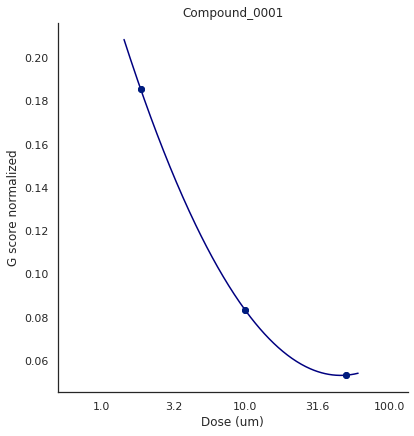

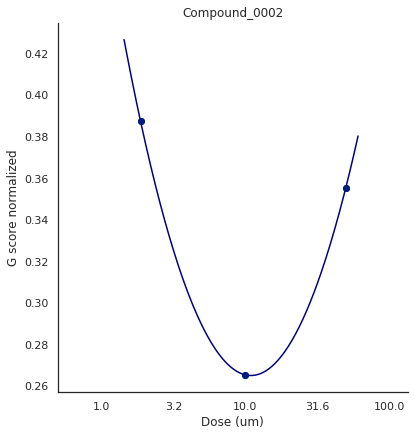

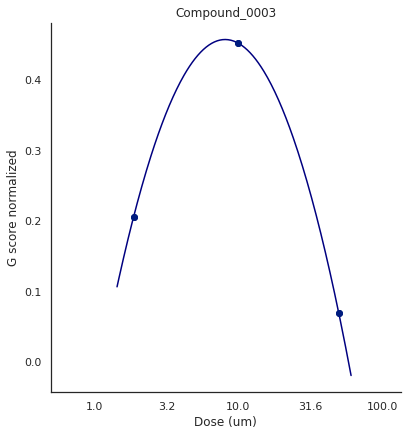

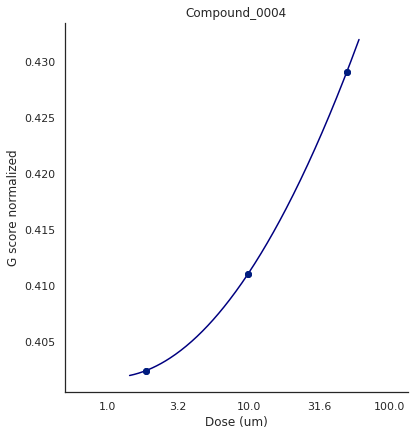

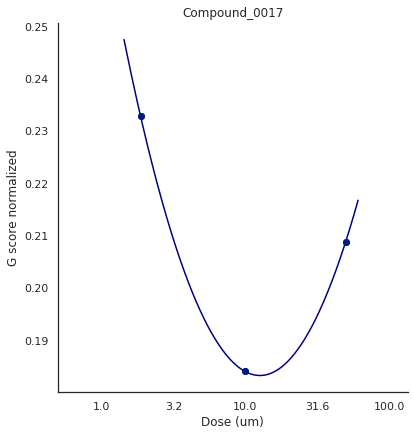

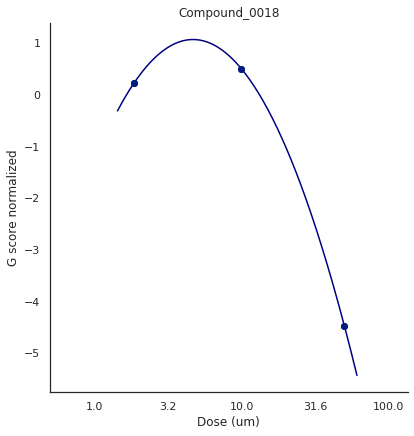

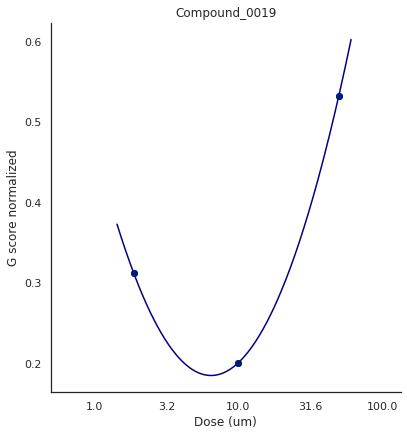

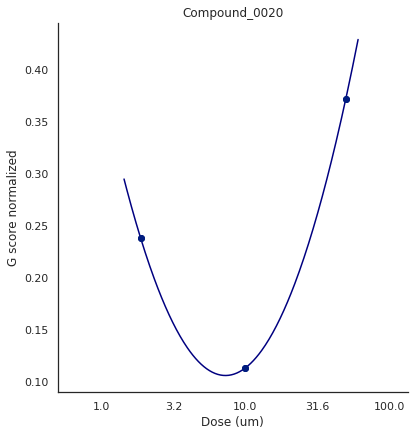

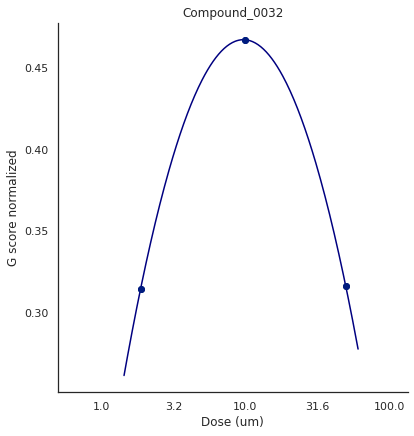

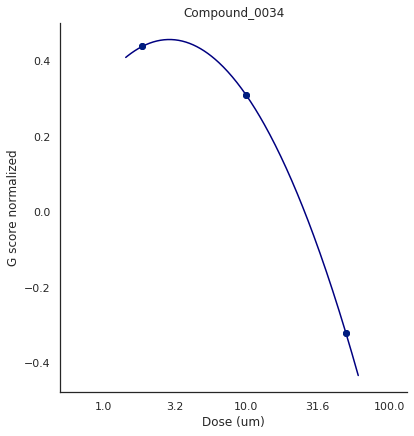

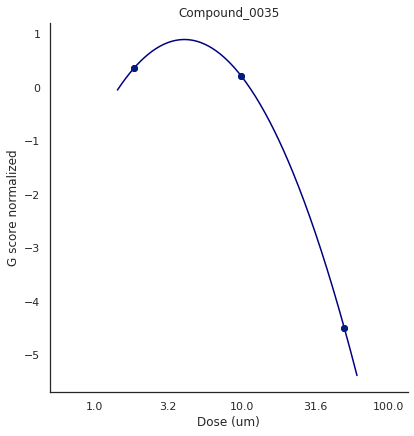

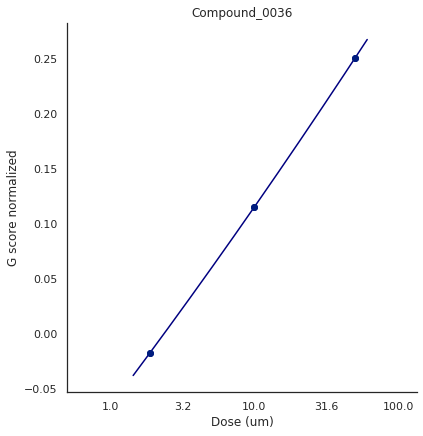

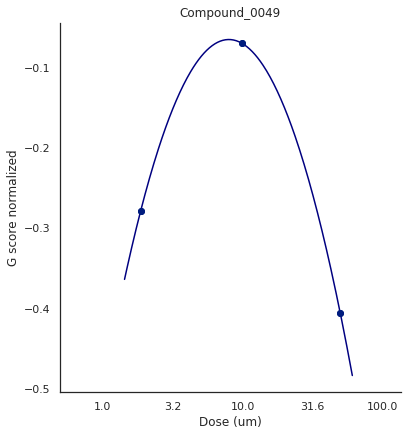

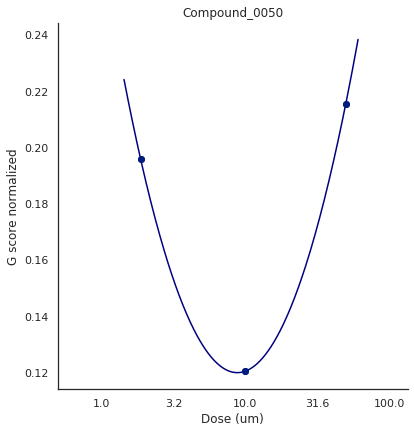

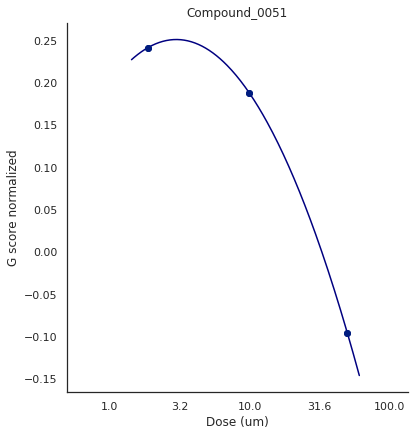

In [15]:
plot_polynomial(cp_data, y_label = 'G score normalized',  degree = 2, path = path)

### Create Presentation
<a id="ppt"></a>

In [16]:
names = cp_data.Compound_id.unique()
print(names[0:5])
files = sorted(os.listdir(path))
print(sorted(files)[0:5])

['Compound_0017' 'Compound_0032' 'Compound_0049' 'Compound_0001'
 'Compound_0018']
['Compound_0001_DR1_line.png', 'Compound_0001_polynomial.png', 'Compound_0002_DR1_line.png', 'Compound_0002_polynomial.png', 'Compound_0003_DR1_line.png']


#### Here we write custom function to create presentation with sorted images

In [17]:
from datetime import date
from pptx import Presentation
from pptx.util import Inches, Pt

def create_presentation_dr(path):   
    report = Presentation('..//resources//templates//ppt_template.pptx')
    slide = report.slides.add_slide(report.slide_layouts[6])  
    subtitle = slide.shapes.add_textbox(left = Inches(5.), top = Inches(3.5), width = Inches(3), height = Inches(0.5),).text_frame
    run = subtitle.paragraphs[0].add_run() 
    run.text = 'Technical Report\nGenerated on {:%m-%d-%Y}'.format(date.today())
    font = run.font
    font.size = Pt(18)
    
    files = sorted(os.listdir(path))
    for n in names:
        all_c = []
        for f in files:
            if n in f:
                all_c.append(f)
        slide = report.slides.add_slide(report.slide_layouts[6])
        subtitle = slide.shapes.add_textbox(left = Inches(0.5), top = Inches(0.3), width = Inches(2), height = Inches(0.5)).text_frame       
        subtitle.text = n
        pic = slide.shapes.add_picture(path + '//' + all_c[0], left = Inches(0.7), top = Inches(0.7), width = Inches(2.5), height= Inches(3)) 
        pic = slide.shapes.add_picture(path + '//' + all_c[1], left  = Inches(5.7), top = Inches(0.7), width = Inches(2.5), height= Inches(3))

    return report
    

In [18]:
report = create_presentation_dr(path).save(path +'//yeast_CP.ppt')

In [19]:
# Clean pictures from output directory
for f in os.listdir(path):
    if '.png' in f:
        os.remove(path +'//' + f)

### Conclusions
<a id="conclusions"></a>

<div align="justify"> Here we tested 15 compounds in 3 different concentrations. Some of them show increase in growth scores with rising concentrations, confirming activity. Other group shows inscrease and then decrease or just decrease in the growth scores, which can be caused by the toxicity of the compounds at high concentrations. These compounds should be further explored using different concentations of the compounds. Third group shows decrease and then increase in the growth sceres, and these compounds remain 'inconclusive'. </div>